In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib as plt 

import statistics
from statistics import mode

In [2]:
from collections import Counter

In [67]:
def majority(arr):
    return(mode(arr))

In [66]:

arr = [2, 7, 3, 3, 7, 6, 6, 6, 1, 9, 0, 1, 7, 6, 3, 2]
len(arr)
majority(arr)

6

In [65]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([6, 12, 8, 7, 9])
np.sqrt(np.sum((arr2-arr1)**2))

13.228756555322953

In [69]:
def euclidean_dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [70]:
test_data1 = pd.read_csv("mnist_test.csv")
train_data1 = pd.read_csv("mnist_train.csv")



In [71]:
test_data = test_data1.head(100)
train_data = train_data1


In [72]:
test_data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
train_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
train_labels = train_data.iloc[:,0]
test_labels = test_data.iloc[:,0]

len(train_labels)

59999

In [75]:
train_data=train_data.drop(train_data.columns[[0]], axis=1)
test_data=test_data.drop(test_data.columns[[0]], axis=1)

In [76]:
test_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
train_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
test_data = test_data.to_numpy()
train_data = train_data.to_numpy()

In [79]:
train_data.shape

(59999, 784)

In [86]:
test_data.shape

(100, 784)

In [88]:
#test_data[0]

In [82]:
euclidean_dist(test_data[0],train_data[0])

2920.0145547582465

In [89]:
#add train data labels to your new dataframe
#use test data labels when selecting labels for the k neighbours
def KNN(test_data,train_data,test_label,train_label,k):
    prediction_list = []
    for i in test_data:
        dist_list = []
        for j in train_data:
            dist = euclidean_dist(i,j)
            #print(dist)
            dist_list.append(dist)
        #print(len(dist_list))
        df = pd.DataFrame()
        df['label'] = train_label
        df['dist'] = dist_list
        df=df.sort_values(by=['dist'])
        #print(df)
        final = []
        for x in range(0,k+1):
            final.append(int(df.iloc[x]['label']))
        #print(final)
        prediction = majority(final)
        #print(prediction)
        prediction_list.append(prediction)
    return prediction_list
        

In [110]:
accuracy = []
k_vals = list(range(1,50,2))
for n in k_vals:
    res = KNN(test_data,train_data,test_labels,train_labels,n)
    result = pd.DataFrame()
    result['label'] = test_labels
    result['prediction'] = res
    cnt = 0
    for i in range(0,len(test_labels)):
        if res[i]==test_labels[i]:
            cnt+=1
    acc = (cnt/len(test_labels))*100
    accuracy.append(acc)
    print("K value: {}  Accuracy: {}".format(n,acc))


K value: 1  Accuracy: 100.0
K value: 3  Accuracy: 100.0
K value: 5  Accuracy: 100.0
K value: 7  Accuracy: 99.0
K value: 9  Accuracy: 98.0
K value: 11  Accuracy: 98.0
K value: 13  Accuracy: 98.0
K value: 15  Accuracy: 98.0
K value: 17  Accuracy: 98.0
K value: 19  Accuracy: 97.0
K value: 21  Accuracy: 98.0
K value: 23  Accuracy: 98.0
K value: 25  Accuracy: 98.0
K value: 27  Accuracy: 98.0
K value: 29  Accuracy: 98.0
K value: 31  Accuracy: 97.0
K value: 33  Accuracy: 97.0
K value: 35  Accuracy: 98.0
K value: 37  Accuracy: 98.0
K value: 39  Accuracy: 98.0
K value: 41  Accuracy: 97.0
K value: 43  Accuracy: 97.0
K value: 45  Accuracy: 96.0
K value: 47  Accuracy: 96.0
K value: 49  Accuracy: 96.0


In [21]:
len(train_labels)

59999

In [51]:
len(test_labels)

100

In [111]:
result

,label,prediction
0,2,2
1,1,1
2,0,0
3,4,4
4,1,1
...,...,...
95,1,1
96,7,7
97,6,6
98,9,9


In [97]:
acc

100.0

In [112]:
final_res = pd.DataFrame()
final_res['K value'] = k_vals
final_res['Accuracy'] = accuracy
final_res

,K value,Accuracy
0,1,100.0
1,3,100.0
2,5,100.0
3,7,99.0
4,9,98.0
5,11,98.0
6,13,98.0
7,15,98.0
8,17,98.0
9,19,97.0


<AxesSubplot:xlabel='K value'>

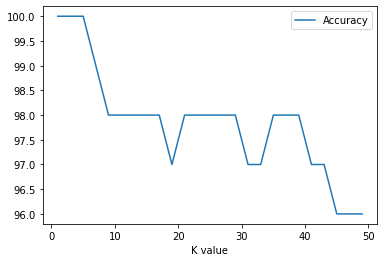

In [113]:
final_res.plot(kind='line',x='K value',y='Accuracy')